In [1]:
import cobra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import warnings
%load_ext autoreload

%autoreload 2
from src import *

from tqdm import tqdm

In [2]:
model = cobra.io.read_sbml_model('data/iML1515.xml')
print(
    f"The biomass functions defined in the model are:"
    + f'\n{model.reactions.get_by_id("BIOMASS_Ec_iML1515_WT_75p37M")}'
    + f'\n{model.reactions.get_by_id("BIOMASS_Ec_iML1515_core_75p37M")}'
)

The biomass functions defined in the model are:
BIOMASS_Ec_iML1515_WT_75p37M: 0.000223 10fthf_c + 0.000223 2dmmql8_c + 2.5e-05 2fe2s_c + 0.000248 4fe4s_c + 0.000223 5mthf_c + 0.000279 accoa_c + 0.000223 adocbl_c + 0.499149 ala__L_c + 0.000223 amet_c + 0.28742 arg__L_c + 0.234232 asn__L_c + 0.234232 asp__L_c + 75.55223 atp_c + 2e-06 btn_c + 0.004952 ca2_c + 0.000223 chor_c + 0.004952 cl_c + 0.002944 clpn160_p + 0.00229 clpn161_p + 0.00118 clpn181_p + 0.000168 coa_c + 2.4e-05 cobalt2_c + 0.008151 colipa_e + 0.129799 ctp_c + 0.000674 cu2_c + 0.088988 cys__L_c + 0.024805 datp_c + 0.025612 dctp_c + 0.025612 dgtp_c + 0.024805 dttp_c + 0.000223 enter_c + 0.000223 fad_c + 0.006388 fe2_c + 0.007428 fe3_c + 0.255712 gln__L_c + 0.255712 glu__L_c + 0.595297 gly_c + 0.154187 glycogen_c + 0.000223 gthrd_c + 0.209121 gtp_c + 70.028756 h2o_c + 0.000223 hemeO_c + 0.092056 his__L_c + 0.282306 ile__L_c + 0.18569 k_c + 0.437778 leu__L_c + 3e-06 lipopb_c + 0.333448 lys__L_c + 3.1e-05 malcoa_c + 0.149336 me

In [3]:
df = pd.read_csv('data/pcbi.1008528.s002 - Biomasses_used.csv', skiprows=1).set_index('Unnamed: 0')
df

,10fthf[c],pydx5p[c],murein3px4p[p],thr__L[c],clpn161[p],gthrd[c],thmpp[c],ni2[c],mn2[c],mocogdp[c],...,dgtp[c],fad[c],succoa[c],->,h[c],adp[c],pi[c],ppi[c],GlucoseUptake,AmoniumUptake
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Class,cofactor,energy,carbohydrate,protein,lipid,protein,energy,ion,ion,DNA,...,DNA,energy,cofactor,NaN,energy,energy,energy,energy,NaN,NaN
MW,473.4393,245.127,1750.6741,119.119,1345.7824,306.316,422.292,58.692,54.937,737.535,...,573.1265,785.5497,862.57,NaN,1,424.179,95.98,174.953,NaN,NaN
WT,0.0001809369184,0.0001809369184,0.000490882671,0.2000123756,0.001858051763,0.0001809369184,0.0001809369184,0.0002490925289,0.0005338856157,0.00000567963421,...,0.0207809702,0.0001809369184,0.00007951487894,->,61.15927482,61.15927482,61.15602932,0.6808659529,-18.0,-18.0
Core,0.0002075503304,0.0002075503304,0,0.2361140956,0,0,0.0002075503304,0.0003006222275,0.0006431268086,0,...,0.02514523443,0.0002075503304,0.00009121045911,->,70.15498998,70.15498998,70.15126711,0.8241377417,-18.0,-18.0
Mean,0.0001942436244,0.0001942436244,0.0002454413355,0.2180632356,0.0009290258815,0.0000904684592,0.0001942436244,0.0002748573782,0.0005885062122,0.000002839817105,...,0.02296310231,0.0001942436244,0.00008536266902,->,65.6571324,65.6571324,65.65364821,0.7525018473,-18.0,-18.0
CarbStarv,0.0001403066433,0.00009353776217,0.00001181919527,0.1837641131,0.00005815825507,0.00007623869345,0.00002338444054,0.00007279646518,0.0001558669164,0.000001299134687,...,0.01050495917,0.00002338444054,0.0000616594217,->,7.904276465,7.904276465,7.903857013,0.3762509236,-0.5,-18.0
NitStarv,0.0003837216192,0.0002877912144,0.001818228532,0.02153882222,0.009176293858,0.000008935866945,0.0003837216192,0.0001357428314,0.0002906434604,0.00000154273936,...,0.01247477583,0.0003837216192,0.0001686310255,->,129.7034136,129.7034136,129.6965307,3.010007389,-18.0,-0.5


In [4]:
BOFs = [
    build_BOF(model, df, 'Mean', 'BIOMASS_UL'),
    build_BOF(model, df, 'CarbStarv', 'BIOMASS_CL'),
    build_BOF(model, df, 'NitStarv', 'BIOMASS_NL'),
]

# Adding biomass functions
model.add_reactions(BOFs)

# Entrypoint is always through reaction ID
BOFs = [bof.id for bof in BOFs]

# Setting bounds of all biomasses to (0,0)
set_all_BOFs_to_zero(model)

In [5]:
steps = 20

glucoses = np.linspace(0, 20, steps)
ammonias = np.linspace(0, 20, steps)

results = pd.DataFrame(columns=['BOF', 'glucose', 'ammonia', 'growth', 'acetate', 'rq'])

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for gl, am in tqdm(itertools.product(glucoses, ammonias), total=len(glucoses)*len(ammonias)):
        for bof in BOFs:
            growth_flux, acetate_flux, rq = run_BOF_test(model, bof, -gl, -am)
            results.loc[len(results)] = [bof, gl, am, growth_flux, acetate_flux, rq]
        
results.head()

results.to_csv('data/BOF_comparison_results.csv', index=False)

100%|██████████| 400/400 [08:11<00:00,  1.23s/it]


In [5]:
def heatmap(data, ax, cmap="inferno", title="", levels=[], cbar=False, **kwargs):
    x_coords = list(data.columns)
    y_coords = list(data.index)
    
    sns.heatmap(
        data,
        annot=False,
        cmap=cmap,
        cbar=cbar,
        square=True,
        xticklabels=[f"{val:>.2f}" for val in x_coords],
        yticklabels=[f"{val:>.2f}" for val in y_coords],
        ax=ax,
        **kwargs
    )
    ax.set_title(title)
    cs = ax.contour(np.arange(.5, data.shape[1]), np.arange(.5, data.shape[0]), data, colors='white', linewidths=1, levels=levels)
    ax.clabel(cs, inline=True, fontsize=10, fmt='%1.2f')
    ax.invert_yaxis()

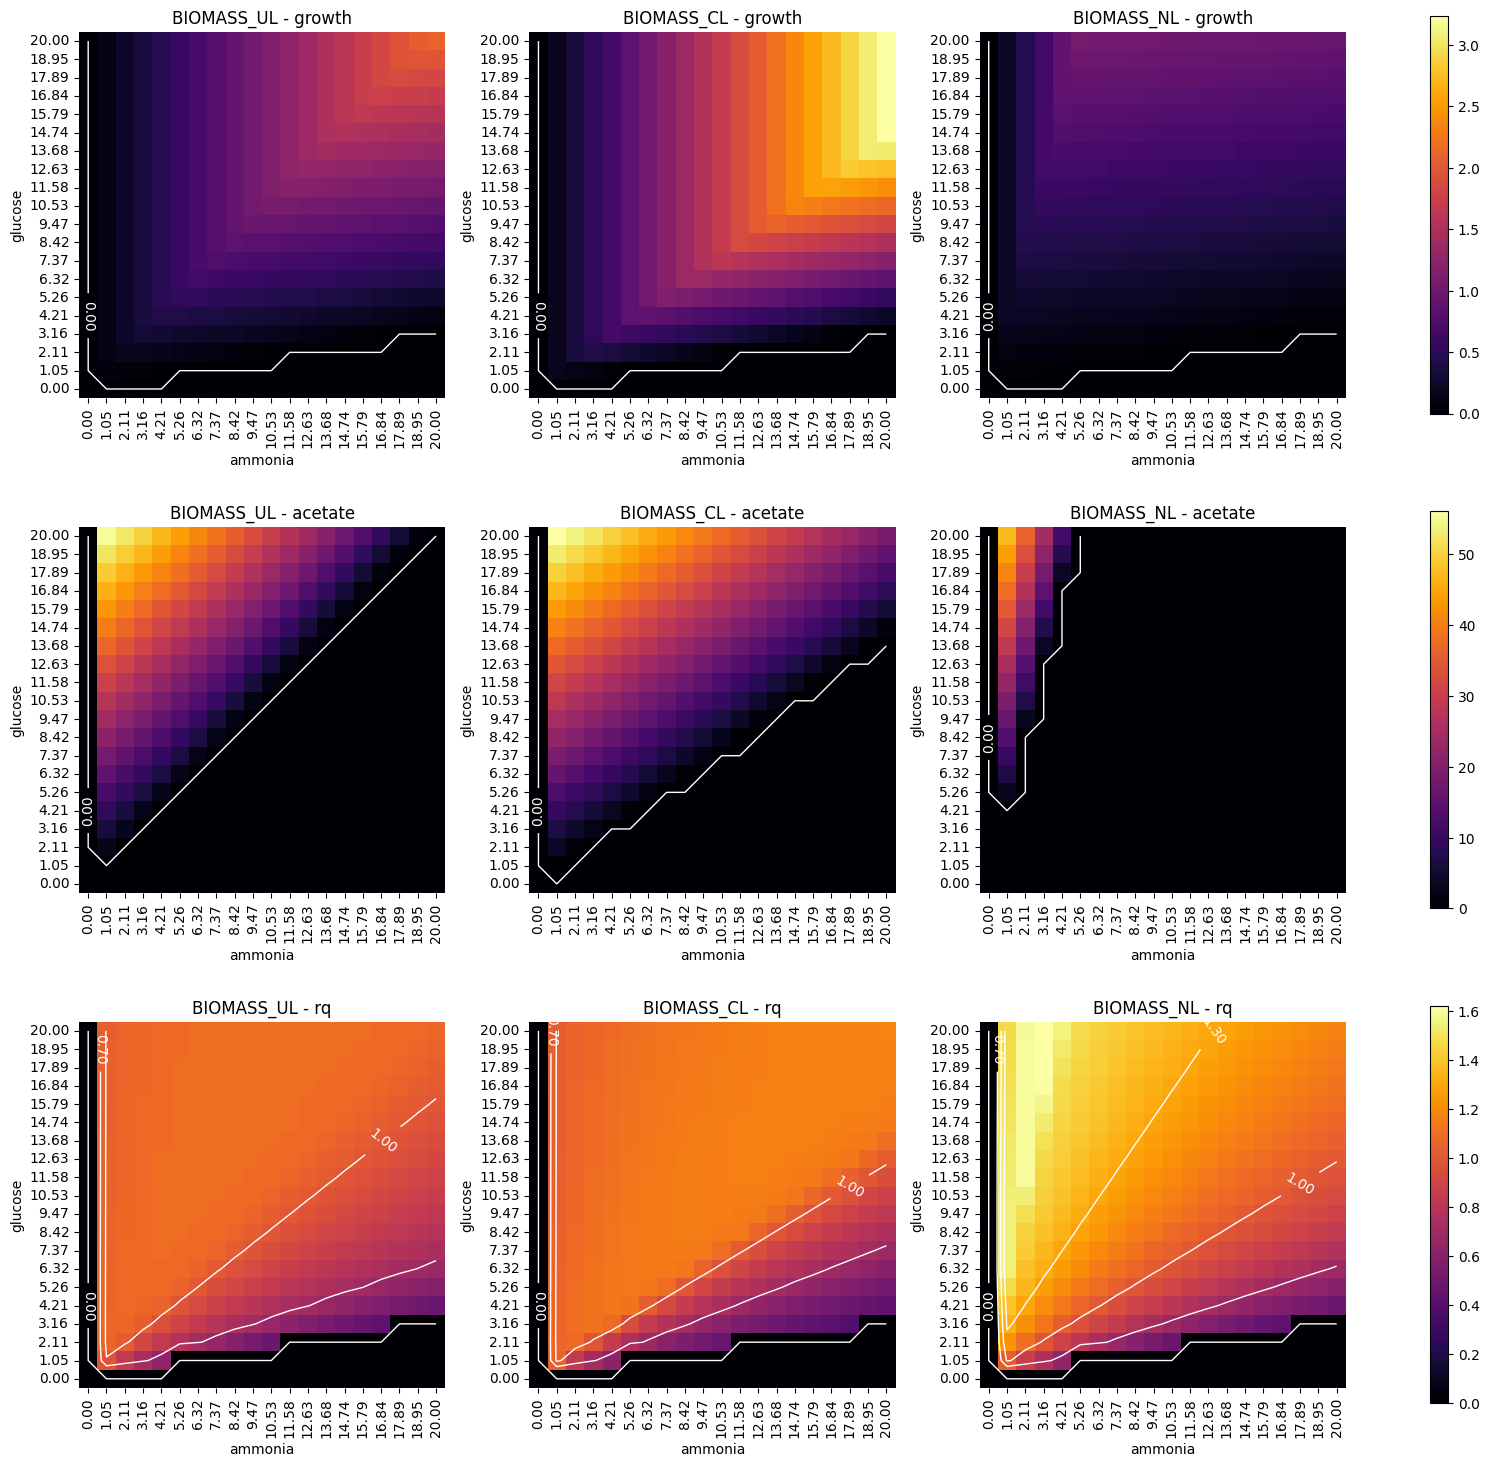

In [7]:
fig, axs = plt.subplots(3, 4, figsize=(15, 15), gridspec_kw={'width_ratios': [1, 1, 1, 0.05]})

for row, val in zip(axs, ["growth", "acetate", "rq"]):
    vmin, vmax = results[val].min(), results[val].max()
    for ax, bof in zip(row[:-1], BOFs):
        data = results[results["BOF"] == bof].pivot(
            index="glucose", columns="ammonia", values=val
        )
        levels = [1e-6]
        if val == "rq":
            levels += [0.7, 1, 1.3] 
        
        heatmap(data, ax, vmin=vmin, vmax=vmax, title=f"{bof} - {val}", levels=levels)

    cbar_ax = row[-1]
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap="inferno", norm=norm)
    cbar = fig.colorbar(sm, cax=cbar_ax)

for ax in axs[:, 3]:
    ax.tick_params(left=False, labelleft=False)

plt.tight_layout()
plt.show()

In [6]:
hip_bofs = []
alphas = np.linspace(0, 1, 11)

hip_bofs = [build_HIP_BOF(model, alpha, 'BIOMASS_NL', 'BIOMASS_CL') for alpha in alphas]

model.add_reactions(hip_bofs)

hip_bofs = [bof.id for bof in hip_bofs]

In [9]:
steps = 20

glucoses = np.linspace(0, 20, steps)
ammonias = np.linspace(0, 20, steps)

results = pd.DataFrame(columns=['BOF', 'alpha', 'glucose', 'ammonia', 'growth', 'acetate', 'rq'])

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for gl, am in tqdm(itertools.product(glucoses, ammonias), total=len(glucoses)*len(ammonias)):
        best_growth = -1
        best_acetate_flux = 0
        best_rq = 0
        for bof in hip_bofs:
            growth_flux, acetate_flux, rq = run_BOF_test(model, bof, -gl, -am)
            if growth_flux > best_growth:
                best_growth = growth_flux
                best_acetate_flux = acetate_flux
                best_rq = rq
                best_bof = bof
                
        best_alpha = float(best_bof.replace("BIOMASS_HIP_", ""))
        results.loc[len(results)] = [best_bof, best_alpha, gl, am, best_growth, best_acetate_flux, best_rq]

results.to_csv('data/HIP_BOF_comparison_results.csv', index=False)
results.head()

100%|██████████| 400/400 [25:57<00:00,  3.89s/it]


,BOF,alpha,glucose,ammonia,growth,acetate,rq
0,BIOMASS_HIP_0.000,0.0,0.0,0.000000,0.0,0.0,0.0
1,BIOMASS_HIP_0.000,0.0,0.0,1.052632,0.0,0.0,0.0
2,BIOMASS_HIP_0.000,0.0,0.0,2.105263,0.0,0.0,0.0
3,BIOMASS_HIP_0.000,0.0,0.0,3.157895,0.0,0.0,0.0
4,BIOMASS_HIP_0.000,0.0,0.0,4.210526,0.0,0.0,0.0


In [7]:
results = pd.read_csv('data/HIP_BOF_comparison_results.csv')

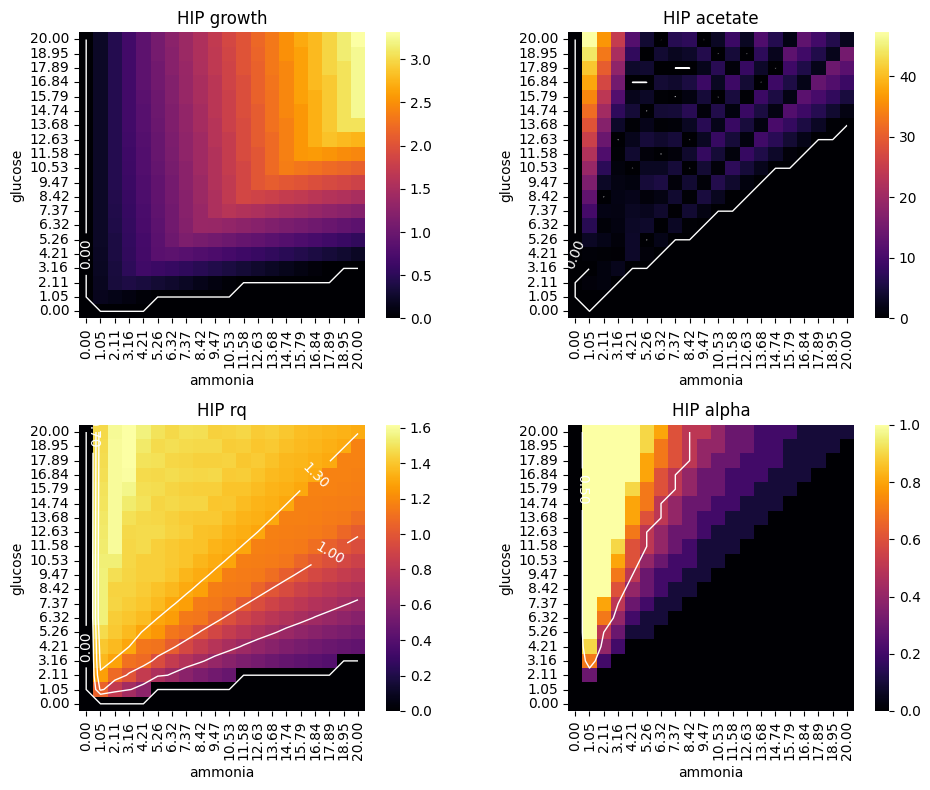

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for ax, val in zip(axs.flatten(), ["growth", "acetate", "rq", "alpha"]):
    vmin, vmax = results[val].min(), results[val].max()
    data = results.pivot(
        index="glucose", columns="ammonia", values=val
    )
    
    levels = [1e-6]
    if val == "rq":
        levels += [0.7, 1, 1.3] 
    elif val == "alpha":
        levels = [0.5]
    
    heatmap(data, ax, vmin=vmin, vmax=vmax, title=f"HIP {val}", levels=levels, cbar=True)

plt.tight_layout()
plt.show()

In [9]:
results2 = pd.read_csv('data/BOF_comparison_results.csv')
results2.head()

,BOF,glucose,ammonia,growth,acetate,rq
0,BIOMASS_UL,0.0,0.000000,0.0,0.0,0.0
1,BIOMASS_CL,0.0,0.000000,0.0,0.0,0.0
2,BIOMASS_NL,0.0,0.000000,0.0,0.0,0.0
3,BIOMASS_UL,0.0,1.052632,0.0,0.0,0.0
4,BIOMASS_CL,0.0,1.052632,0.0,0.0,0.0


In [ ]:
import plotly.graph_objects as go

eps = 1e-3

grid1 = results.pivot(index='glucose', columns='ammonia', values='growth')
grid2 = results2[results2['BOF'] == 'BIOMASS_NL'].pivot(index='glucose', columns='ammonia', values='growth')
grid3 = results2[results2['BOF'] == 'BIOMASS_CL'].pivot(index='glucose', columns='ammonia', values='growth')

colorscale_red = [[0, 'red'], [1, 'red']]
colorscale_green = [[0, 'green'], [1, 'green']]
colorscale_blue = [[0, 'blue'], [1, 'blue']]

# Create a 3D surface plot
fig = go.Figure()

fig.add_trace(go.Surface(z=grid2.values - eps, x=grid2.columns, y=grid2.index, colorscale=colorscale_green, name='NL' ))
fig.add_trace(go.Surface(z=grid3.values - eps, x=grid3.columns, y=grid3.index, colorscale=colorscale_blue, name='CL' ))
fig.add_trace(go.Surface(z=grid1.values, x=grid1.columns, y=grid1.index, colorscale=colorscale_red, name='HPI'))


fig.update_layout(scene=dict(
    xaxis_title='Y',
    yaxis_title='X',
    zaxis_title='Val'
))

fig.show()


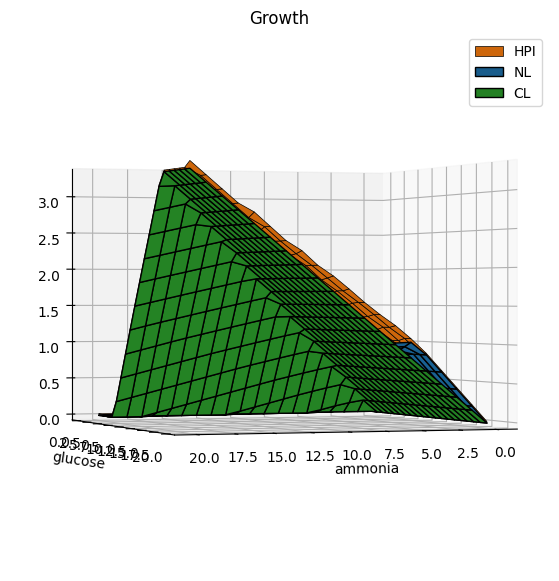

In [60]:
eps = 1e-2

X, Y = np.meshgrid(grid1.columns, grid1.index)  # Create meshgrid for x and y

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf1 = ax.plot_surface(X, Y, grid1.values + eps, color="tab:orange", edgecolor='k', alpha=1, label="HPI", linewidth=0.5)

surf2 = ax.plot_surface(X, Y, grid2.values - eps, color="tab:blue", edgecolor='k', alpha=1, label="NL")
surf3 = ax.plot_surface(X, Y, grid3.values - eps, color="tab:green", edgecolor='k', alpha=1, label="CL")


# Add colorbar and labels
# fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=10)
ax.set_xlabel('ammonia')
ax.set_ylabel('glucose')
ax.set_title('Growth')

ax.view_init(elev=0, azim=70)

ax.legend()

# Show the plot
plt.show()